# Covid-19 detection using X-rays

### Import the required library 

In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

#### Displaying the structure of Dataset folder 

In [2]:
print(os.listdir(r"C:\Users\HP\Desktop\Final Project\Dataset"))

['Prediction', 'Train', 'Val']


## Building Architecture

In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

## Train from Scratch

#### Data Augmentation 

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\Desktop\Final Project\Dataset\Train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    r"C:\Users\HP\Desktop\Final Project\Dataset\Val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

# Fit the Model

In [10]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 155s 12s/step - loss: 0.8783 - accuracy: 0.5297 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 82s 10s/step - loss: 0.6881 - accuracy: 0.5464 - val_loss: 0.6789 - val_accuracy: 0.5333
Epoch 3/10
8/8 [==============================] - 82s 10s/step - loss: 0.6357 - accuracy: 0.6404 - val_loss: 0.5848 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 82s 10s/step - loss: 0.4669 - accuracy: 0.7618 - val_loss: 0.3120 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 81s 10s/step - loss: 0.3276 - accuracy: 0.8572 - val_loss: 0.1915 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 81s 10s/step - loss: 0.2818 - accuracy: 0.8874 - val_loss: 0.3205 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 81s 10s/step - loss: 0.2859 - accuracy: 0.8907 - val_loss: 0.0939 - val_accuracy: 0.9833
Epoch 8/10
8/8 [==========

# Loss is very less and accuracy is on point

#### save trained model file locally 

In [11]:
model.save("Detection_Covid_19.h5")

In [12]:
model.evaluate(train_generator)

9/9 [==============================] - 31s 3s/step - loss: 0.1748 - accuracy: 0.9722


[0.1747848242521286, 0.9722222089767456]

In [13]:
model.evaluate(validation_generator)

2/2 [==============================] - 7s 2s/step - loss: 0.1299 - accuracy: 0.9833


[0.12985281646251678, 0.9833333492279053]

#### Plotting train_loss vs val_loss

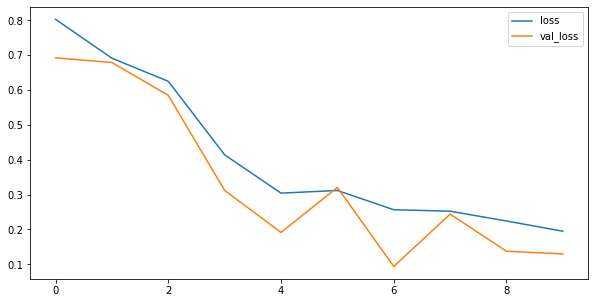

In [14]:
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.legend()

##### Plotting train_accuracy vs Val_accuracy 

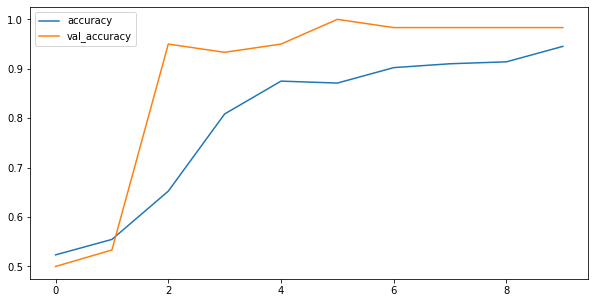

In [15]:

plt.figure(figsize=(10,5))
plt.plot(hist.history["accuracy"],label="accuracy")
plt.plot(hist.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

#### Load the model

In [16]:
model = load_model("Detection_Covid_19.h5")

# List all data in history

In [17]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Summarize history for accuracy

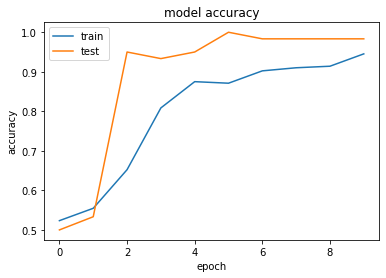

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss

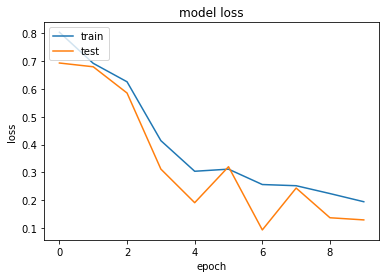

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Confusion Matrix

In [20]:
import os
y_actual = []
y_test = []

for i in os.listdir("Dataset/Val/Normal"):
  img = image.load_img("Dataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [21]:
for i in os.listdir("./Dataset/Val/Covid"):
  img = image.load_img("./Dataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [22]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

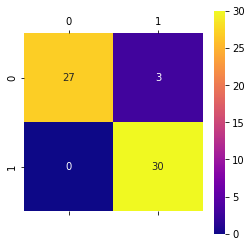

In [23]:
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns

cm = confusion_matrix(y_actual,y_test)
pl.matshow(cm)
sns.heatmap(cm,cmap = "plasma" , annot=True)

<AxesSubplot:>

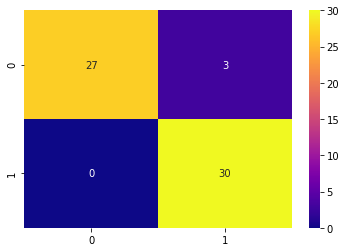

In [24]:
import seaborn as sns
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Confusion Matrix with Labels

Confusion matrix, without normalization
[[27  3]
 [ 0 30]]


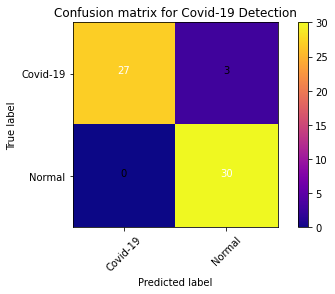

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

# Predictions from X-Ray Images 

User Entered Image
[[[[0.38839287 0.38839287 0.38839287]
   [0.4017857  0.4017857  0.4017857 ]
   [0.39732143 0.39732143 0.39732143]
   ...
   [0.61160713 0.61160713 0.61160713]
   [0.6026786  0.6026786  0.6026786 ]
   [0.60714287 0.60714287 0.60714287]]

  [[0.65178573 0.65178573 0.65178573]
   [0.6160714  0.6160714  0.6160714 ]
   [0.57589287 0.57589287 0.57589287]
   ...
   [0.6339286  0.6339286  0.6339286 ]
   [0.61160713 0.61160713 0.61160713]
   [0.63839287 0.63839287 0.63839287]]

  [[0.71875    0.71875    0.71875   ]
   [0.7276786  0.7276786  0.7276786 ]
   [0.75       0.75       0.75      ]
   ...
   [0.65625    0.65625    0.65625   ]
   [0.65625    0.65625    0.65625   ]
   [0.6473214  0.6473214  0.6473214 ]]

  ...

  [[0.88839287 0.88839287 0.88839287]
   [0.8973214  0.8973214  0.8973214 ]
   [0.91964287 0.91964287 0.91964287]
   ...
   [0.8526786  0.8526786  0.8526786 ]
   [0.8348214  0.8348214  0.8348214 ]
   [0.7723214  0.7723214  0.7723214 ]]

  [[0.875      0.875      

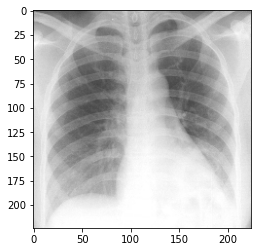

In [27]:
path="Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg"
img= image.load_img(path,target_size=(224,224))
print("User Entered Image")
plt.imshow(img)

img= image.img_to_array(img)/224
img= np.array([img])
print(img)
img.shape

results=(model.predict(img) > 0.5).astype("int32")
if results[0]== 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

User Entered Image
Prediction Of Our Model :  Negative for Covid-19


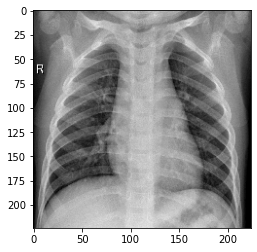

In [30]:
path="Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg"
img= image.load_img(path,target_size=(224,224))
print("User Entered Image")
plt.imshow(img)

img= image.img_to_array(img)/224
img= np.array([img])
img.shape

results=(model.predict(img) > 0.5).astype("int32")
if results[0]== 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)